[View in Colaboratory](https://colab.research.google.com/github/lakshmirkishtipati/MachineLearning/blob/master/LogisticRegression/CreditDefault/Credit_Default_Logistic_practice.ipynb)

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
!pip install -q xlrd
!git clone https://github.com/lakshmirkishtipati/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Counting objects: 51, done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [3]:
!ls MachineLearning/LogisticRegression/CreditDefault

attachment_default.csv


In [0]:
default_df = pd.read_csv('MachineLearning/LogisticRegression/CreditDefault/attachment_default.csv')

In [5]:
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


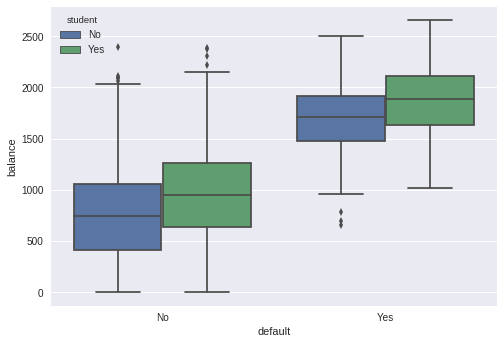

In [7]:
#help(sns.boxplot)
sns.boxplot(x='default',y='balance',hue='student',data=default_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


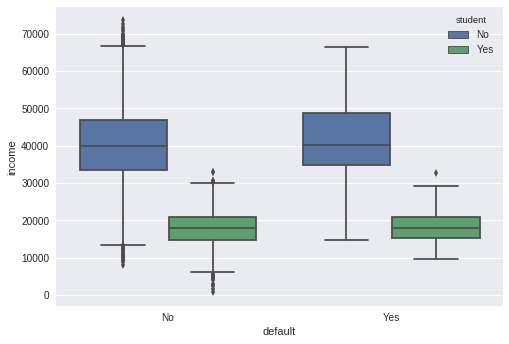

In [8]:
sns.boxplot(x='default',y='income',hue='student',data=default_df)

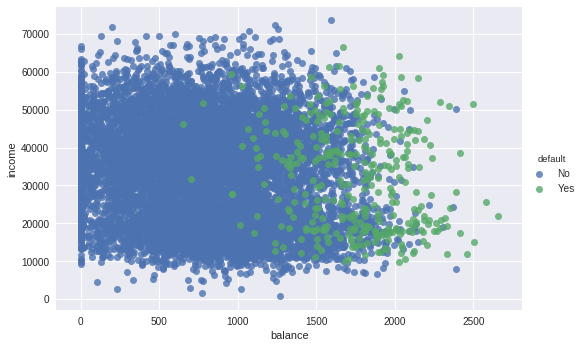

In [9]:
sns.lmplot(x='balance',y='income',hue='default',data = default_df,aspect=1.5,ci=None,fit_reg=False,)

In [10]:
#help(pd.crosstab)
print(default_df[default_df['student']=='Yes'])
pd.crosstab(default_df['default'],default_df['student'])

     default student      balance        income
1         No     Yes   817.180407  12106.134700
5         No     Yes   919.588530   7491.558572
7         No     Yes   808.667504  17600.451344
10        No     Yes     0.000000  21871.073089
11        No     Yes  1220.583753  13268.562221
17        No     Yes   527.540184  17636.539617
29        No     Yes  1119.569353  16556.070205
31        No     Yes   448.880656  15799.470410
32        No     Yes   584.904895  22429.935046
34        No     Yes  1423.938917  22634.488088
35        No     Yes  1499.724657  13190.652716
43        No     Yes   220.555608  16872.947556
44        No     Yes  1690.234410  19052.572225
51        No     Yes  1282.972534  13120.636470
52        No     Yes  1505.782675  26557.141446
53        No     Yes   904.040259  16882.300606
55        No     Yes  1294.497347  10464.320732
56        No     Yes  1275.550633  15887.468487
73        No     Yes  1578.064099  19886.493952
75        No     Yes   752.459946  16211

student,No,Yes
default,,
No,6850,2817
Yes,206,127


In [11]:
# converting default to dummies

default_dummies = pd.get_dummies(default_df['default'],prefix='default')
default_dummies.drop(default_dummies.columns[0],axis=1,inplace=True)
default_df = pd.concat([default_df,default_dummies],axis=1)
default_df

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
5,No,Yes,919.588530,7491.558572,0
6,No,No,825.513331,24905.226578,0
7,No,Yes,808.667504,17600.451344,0
8,No,No,1161.057854,37468.529288,0
9,No,No,0.000000,29275.268293,0


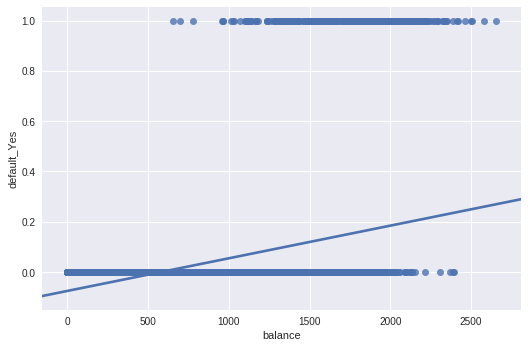

In [12]:
#default_df.head()
sns.lmplot(x='balance',y='default_Yes',data=default_df,aspect = 1.5,ci = None, fit_reg=True)

In [0]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

[[0.00478248]]
[-9.46506555]
[0 0 0 ... 0 0 0]
[[9.97467775e-01 2.53222488e-03]
 [9.96154193e-01 3.84580671e-03]
 [9.87014365e-01 1.29856348e-02]
 ...
 [9.95600704e-01 4.39929595e-03]
 [8.76675206e-01 1.23324794e-01]
 [9.99797417e-01 2.02582703e-04]]


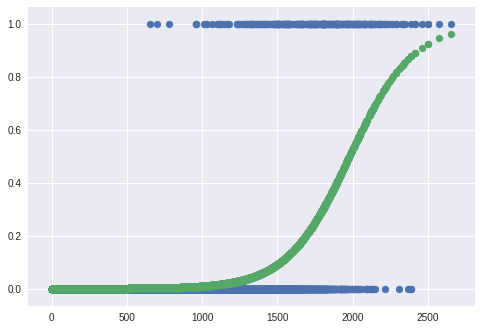

In [14]:
# Building logistic Regression on the Model

x = default_df[['balance']]
y = default_df['default_Yes']
logreg = LogisticRegression()
logreg.fit(x,y)
print(logreg.coef_)
print(logreg.intercept_)

y_pred = logreg.predict(x)
y_pred_prob = logreg.predict_proba(x)
print(y_pred)
print(y_pred_prob)

plt.pyplot.scatter(x.values,y)
plt.pyplot.scatter(x.values,y_pred_prob[:,1])

### Creating Logistic Model

In [15]:
default_df.head()

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [16]:
student_dummies = pd.get_dummies(default_df['student'],prefix='student')
student_dummies.drop(student_dummies.columns[0],axis=1,inplace=True)
default_df = pd.concat([default_df,student_dummies],axis=1)
default_df.head()

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [17]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
x = default_df[['balance','income','student_Yes']]
y = default_df['default']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [0]:
logreg = LogisticRegression(C=.1)

In [20]:
logreg.fit(xtrain,ytrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_log_pred_test = logreg.predict(xtest)
y_log_pred_train = logreg.predict(xtrain)

In [22]:
metrics.accuracy_score(ytest,y_log_pred_test)

0.9666666666666667

In [23]:
metrics.accuracy_score(ytrain,y_log_pred_train)

0.966

In [24]:
conf = metrics.confusion_matrix(ytest,y_log_pred_test)
conf

array([[2900,    3],
       [  97,    0]])

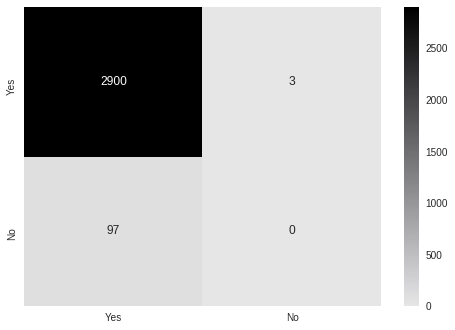

In [25]:
cmap = sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['Yes','No'],yticklabels=['Yes','No'],annot=True,fmt="d")